In [1]:
import numpy as np
import copy
import pandas as pd
import sys
import math
from itertools import combinations
from Algorithms import pattern_count
import time
from Algorithms import NewAlgRanking_19_20211216 as newalg
from Algorithms import NaiveAlgRanking_4_20211213 as naivealg
from sklearn.linear_model import LinearRegression
import shap

In [2]:
import os
os.getcwd()


'/Users/jinyangli/Desktop/Project1_UnfairlyTreatedGroups/UnfairlyTreatedGroupDetection/Coding/Experiments/Shapley_value'

# compas


In [8]:

all_attributes = ["age_binary", "sex_binary", "race_C", "MarriageStatus_C", "juv_fel_count_C",
                  "decile_score_C", "juv_misd_count_C", "juv_other_count_C", "priors_count_C",
                  "days_b_screening_arrest_C",
                  "c_days_from_compas_C", "c_charge_degree_C", "v_decile_score_C", "start_C", "end_C",
                  "event_C"]

original_data_file = r"../../../InputData/CompasData/general/compas_data_cat_necessary_att_ranked.csv"

ranked_data = pd.read_csv(original_data_file, index_col=False)


x = ranked_data[all_attributes]
y = ranked_data['rank']

# with sklearn
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [9]:
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

age_binary = 118.35712
sex_binary = -106.43005
race_C = -48.16972
MarriageStatus_C = -15.31068
juv_fel_count_C = 123.51085
decile_score_C = 246.2854
juv_misd_count_C = 610.78696
juv_other_count_C = 886.57479
priors_count_C = 1245.29947
days_b_screening_arrest_C = 595.05885
c_days_from_compas_C = 1391.6477
c_charge_degree_C = -2.53718
v_decile_score_C = 4.28951
start_C = 1254.30561
end_C = 1908.92354
event_C = -86.05551


In [10]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, x)
shap_values = explainer(x)

Permutation explainer: 6890it [02:10, 50.96it/s]                          


In [11]:
shap_values

.values =
array([[  -26.03856592,    17.02880754,   -21.67637241, ...,
            0.        , -1698.94194701,   -50.77275139],
       [  -26.03856592,    17.02880754,    26.49334406, ...,
            0.        , -1698.94194701,   -50.77275139],
       [  -26.03856592,    17.02880754,    26.49334406, ...,
            0.        , -1698.94194701,   -50.77275139],
       ...,
       [  -26.03856592,   -89.40123956,    26.49334406, ...,
            0.        ,  2118.90512492,    35.28275944],
       [  -26.03856592,    17.02880754,    26.49334406, ...,
            0.        ,  2118.90512492,    35.28275944],
       [  -26.03856592,    17.02880754,    26.49334406, ...,
            0.        ,   209.98158896,    35.28275944]])

.base_values =
array([3313.66118335, 3313.66118335, 3313.66118335, ..., 3313.66118335,
       3313.66118335, 3313.66118335])

.data =
array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 2

In [12]:
len(shap_values)



6889

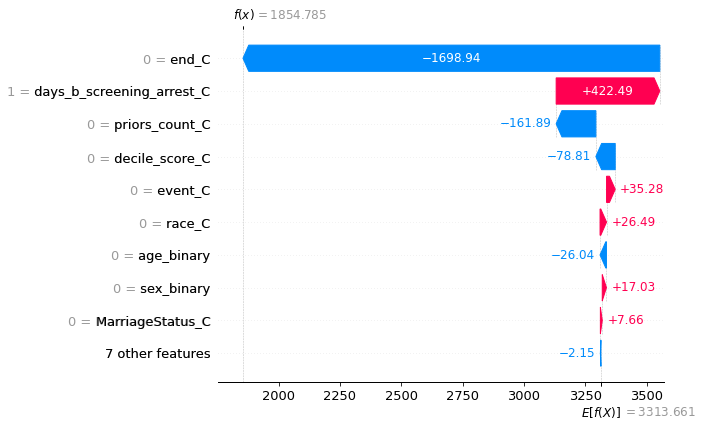

In [13]:
shap.plots.waterfall(shap_values[20])


In [14]:
shap_values[0]

.values =
array([-2.60385659e+01,  1.70288075e+01, -2.16763724e+01,  7.65534086e+00,
       -3.70532547e+00, -7.88113274e+01,  0.00000000e+00,  0.00000000e+00,
       -1.61888931e+02, -1.72567066e+02,  0.00000000e+00,  9.64127745e-01,
       -1.15816771e+00,  0.00000000e+00, -1.69894195e+03, -5.07727514e+01])

.base_values =
3313.661183347886

.data =
array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [15]:
shap_values[1]


.values =
array([-2.60385659e+01,  1.70288075e+01,  2.64933441e+01,  7.65534086e+00,
       -3.70532547e+00, -7.88113274e+01,  0.00000000e+00,  0.00000000e+00,
       -1.61888931e+02,  4.22491783e+02,  0.00000000e+00, -1.57305053e+00,
       -1.15816771e+00,  0.00000000e+00, -1.69894195e+03, -5.07727514e+01])

.base_values =
3313.661183347886

.data =
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [16]:
sum(shap_values[0:3])


.values =
array([-7.81156978e+01,  5.10864226e+01,  3.13103157e+01,  2.29660226e+01,
       -1.11159764e+01,  9.85141592e+00,  0.00000000e+00,  0.00000000e+00,
       -4.85666794e+02,  7.73576504e+01,  0.00000000e+00,  3.55204959e-01,
       -3.47450314e+00,  0.00000000e+00, -5.09682584e+03, -1.52318254e+02])

.base_values =
9940.983550043658

.data =
array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3])

In [18]:
# unfairly treated groups definition 1
# k = 50
# k_min = k
# k_max = k
# thc = 50
# Lowerbounds = [40]

groups = [
    [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0],
    [-1, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1],
    [-1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
]


In [36]:
def P1DominatedByP2(P1, P2):
    length = len(P1)
    for i in range(length):
        if P1[i] == -1:
            if P2[i] != -1:
                return False
        if P1[i] != -1:
            if P2[i] != P1[i] and P2[i] != -1:
                return False
    return True

def tuples_in_group(group, data):
    def belong_to_group(row):
        nonlocal group
        if P1DominatedByP2(row, group):
            return True
        else:
            return False
    data["in"] = data.apply(belong_to_group, axis=1)
    return data[data["in"] == True].index

def shapley_values(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    tuples_idx = tuples_in_group(group, data1)
    if len(tuples_idx) == 0:
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
    else:
        avg = np.average(shap_values.values[tuples_idx.to_list()], axis=0)
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
        output_file.write(str(avg))

# for the whole dataset
output_path = r'compas_avg_wholedata.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")

for g in groups:
    shapley_values(ranked_data, g, all_attributes, shap_values, output_file)


In [35]:
# for top k

def shapley_values(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    tuples_idx = tuples_in_group(group, data1).to_list()
    print(tuples_idx)
    if len(tuples_idx) == 0:
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
    else:
        avg = np.average(shap_values.values[tuples_idx], axis=0)
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
        output_file.write(str(avg))

output_path = r'compas_avg_topk.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")

for g in groups:
    shapley_values(ranked_data[:50], g, all_attributes, shap_values, output_file)


[0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 43, 44, 46, 47, 48]
[4, 6, 12, 14, 18, 21, 28, 32, 38, 42, 45, 49]
[15, 19, 21, 28, 31, 33, 41, 45, 46, 47]
[1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 19, 20, 23, 24, 25, 26, 27, 31, 32, 35, 37, 39, 40, 42, 43, 47]
[0, 4, 14, 18, 22, 28, 33, 38, 41, 44, 46, 49]
[9, 17, 21, 29, 30, 34, 36, 45, 48]
[21, 43]
[]
[11, 19]
[4, 45]
[0, 1, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 17, 20, 21, 23, 24, 25, 27, 28, 29, 30, 33, 34, 35, 36, 38, 39, 41, 42, 44, 45, 49]
[2, 7, 10, 11, 16, 18, 19, 22, 26, 31, 32, 37, 40, 43, 46, 47, 48]
[]
[]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 21, 22, 23, 24, 27, 28, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 45, 47, 48, 49]
[1, 11, 12, 16, 19, 20, 25, 26, 29, 31, 38, 43, 44, 46]
[]
[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 23, 24, 26, 29, 30, 31, 32, 34, 35, 37, 39, 42, 43, 46]
[1, 3, 14, 18, 20, 21, 22, 25, 27, 28, 

In [42]:
def tuples_in_group_w_attribute(group, data, att, value):
    def belong_to_group(row):
        nonlocal group
        if P1DominatedByP2(row, group):
            if row[att] == value:
                return True
            else:
                return False
        else:
            return False
    data["in"] = data.apply(belong_to_group, axis=1)
    idx = data[data["in"] == True].index
    data.drop(columns=["in"], axis=1, inplace=True)
    return idx


def shapley_values_att_value_seperated(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    att_idx = 0
    for att in all_attributes:
        print("\n")
        for v in range(int(data1.describe()[att]["min"]), int(data1.describe()[att]["max"]) + 1):
            tuples_idx = tuples_in_group_w_attribute(group, data1, att, v).to_list()
            if len(tuples_idx) == 0:
                output_file.write("group {} att {} = {} size {}\n".format(group, att, v, len(tuples_idx)))
            else:
                print(group, att, v, len(tuples_idx))
                values_of_group = shap_values.values[tuples_idx]
                avg = np.average(values_of_group, axis=0)
                print(avg)
                output_file.write("group {} att {} = {} size {} avg {}\n".format(group, att, v, len(tuples_idx), avg[att_idx]))
        att_idx += 1


# for the whole dataset
output_path = r'compas_avg_wholedata_value_seperated.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")

for g in groups:
    shapley_values_att_value_seperated(ranked_data, g, all_attributes, shap_values, output_file)




[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] age_binary 0 4230
[-2.60385659e+01 -3.07464581e+00 -3.70098294e-01  3.43856918e+00
 -3.35494008e+00  3.32106835e+01  1.58833489e+00  1.25755289e+00
 -5.26676301e+01  1.81893875e+01  8.22486823e+00  1.28598351e-01
  3.66991415e-01  8.59925832e+00 -1.58264653e+02 -1.90624146e+00]


[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] sex_binary 0 3431
[-2.60385659e+01  1.70288075e+01 -2.37970473e-01  3.70160609e+00
 -3.27334348e+00  3.66865466e+01  1.95822109e+00  1.55040768e+00
 -3.88471007e+01  2.30687198e+01  6.89536898e+00  1.69919214e-01
  4.98375806e-01  1.02362451e+01 -2.47915255e+02 -3.59396507e+00]
[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] sex_binary 1 799
[-2.60385659e+01 -8.94012396e+01 -9.37470702e-01  2.30905776e+00
 -3.70532547e+00  1.82849184e+01  0.00000000e+00  0.00000000e+00
 -1.12014610e+02 -2.76303921e+00  1.39338944e+01 -4.88383003e-02
 -1.97188616e-01  1.56984432e+00  

In [43]:
# top k

def shapley_values_att_value_seperated(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    att_idx = 0
    for att in all_attributes:
        for v in range(int(data1.describe()[att]["min"]), int(data1.describe()[att]["max"]) + 1):
            tuples_idx = tuples_in_group_w_attribute(group, data1, att, v).to_list()
            if len(tuples_idx) == 0:
                output_file.write("group {} att {} = {} size {}\n".format(group, att, v, len(tuples_idx)))
            else:
                print(group, att, v, len(tuples_idx))
                values_of_group = shap_values.values[tuples_idx]
                avg = np.average(values_of_group, axis=0)
                print(avg)
                output_file.write("group {} att {} = {} size {} avg {}\n".format(group, att, v, len(tuples_idx), avg[att_idx]))
        att_idx += 1


# for the whole dataset
output_path = r'compas_avg_topk_value_seperated.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")

for g in groups:
    output_file.write("\n")
    shapley_values_att_value_seperated(ranked_data[:50], g, all_attributes, shap_values, output_file)


[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] age_binary 0 38
[-2.60385659e+01 -2.57672746e+00  1.14086171e+00  4.02912677e+00
 -3.70532547e+00  1.84065929e+01  0.00000000e+00  0.00000000e+00
 -1.61888931e+02  1.53462545e+01  0.00000000e+00  9.61457031e-02
  7.60823624e-01  0.00000000e+00 -1.69894195e+03 -3.94496579e+01]
[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] sex_binary 0 31
[-2.60385659e+01  1.70288075e+01  7.76930911e-02  5.18587606e+00
 -3.70532547e+00  8.58026548e+00  0.00000000e+00  0.00000000e+00
 -1.61888931e+02  1.91954468e-01  0.00000000e+00  1.45683140e-01
  6.40659081e-01  0.00000000e+00 -1.69894195e+03 -3.68928303e+01]
[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] sex_binary 1 7
[-2.60385659e+01 -8.94012396e+01  5.84917986e+00 -1.09362012e+00
 -3.70532547e+00  6.19231858e+01  0.00000000e+00  0.00000000e+00
 -1.61888931e+02  8.24581548e+01  0.00000000e+00 -1.23234373e-01
  1.29298089e+00  0.00000000e+00 -1.69894195


# student dataset

In [16]:

all_attributes = ['school_C', 'sex_C', 'age_C', 'address_C', 'famsize_C', 'Pstatus_C', 'Medu_C',
                  'Fedu_C', 'Mjob_C', 'Fjob_C', 'reason_C', 'guardian_C', 'traveltime_C', 'studytime_C',
                  'failures_C', 'schoolsup_C', 'famsup_C', 'paid_C', 'activities_C', 'nursery_C', 'higher_C',
                  'internet_C', 'romantic_C', 'famrel_C', 'freetime_C', 'goout_C', 'Dalc_C', 'Walc_C',
                  'health_C', 'absences_C', 'G1_C', 'G2_C', 'G3_C']
selected_attributes = \
    ['school_C', 'sex_C', 'age_C', 'address_C', 'famsize_C', 'Pstatus_C',
     'Medu_C', 'Fedu_C', 'Mjob_C', 'Fjob_C', 'reason_C',
     'health_C', 'absences_C', 'G1_C', 'G2_C', 'G3_C']
original_data_file = r"../../../InputData/StudentDataset/ForRanking_1/student-mat_cat_ranked.csv"

ranked_data = pd.read_csv(original_data_file, index_col=False)

x = ranked_data[selected_attributes]
y = ranked_data['rank']

# with sklearn
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [17]:
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

school_C = 13.41238
sex_C = 5.64058
age_C = 18.15879
address_C = 7.35572
famsize_C = -2.81089
Pstatus_C = 7.54092
Medu_C = -2.29391
Fedu_C = -0.85086
Mjob_C = -1.04814
Fjob_C = -1.6855
reason_C = 0.08999
health_C = 1.44026
absences_C = 21.52272
G1_C = -27.14551
G2_C = -22.92712
G3_C = -90.36437


In [18]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, x)
shap_values = explainer(x)

In [19]:
shap_values

.values =
array([[  -2.682475  ,   -2.93310265,   -1.27111502, ...,  -39.63244689,
         -33.01505246, -129.22105538],
       [  -2.682475  ,   -2.93310265,   -1.27111502, ...,  -39.63244689,
         -33.01505246, -129.22105538],
       [  -2.682475  ,   -2.93310265,   -1.27111502, ...,  -39.63244689,
         -33.01505246, -129.22105538],
       ...,
       [  10.72990002,   -2.93310265,   16.88767099, ...,   14.65857625,
          35.76630683,  141.87206779],
       [  10.72990002,    2.70747937,   16.88767099, ...,   14.65857625,
          35.76630683,  141.87206779],
       [  10.72990002,    2.70747937,   -1.27111502, ...,   14.65857625,
          35.76630683,  141.87206779]])

.base_values =
array([194.06979263, 194.06979263, 194.06979263, 194.06979263,
       194.06979263, 194.06979263, 194.06979263, 194.06979263,
       194.06979263, 194.06979263, 194.06979263, 194.06979263,
       194.06979263, 194.06979263, 194.06979263, 194.06979263,
       194.06979263, 194.06979263, 19

In [8]:
len(shap_values)


395

In [9]:
groups = [
[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1],
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1],
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1],
[0, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, 1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, 1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, 1, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1, -1],
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1],
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1],
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1],
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2],
[-1, -1, -1, 0, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, 1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2],
[-1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, 0, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, -1, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, -1, 2, -1, -1, 4, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, -1, -1, 1, -1, 4, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, 2, -1],
[-1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1, 2],
[-1, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1, -1, 2],
[-1, -1, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, 2, -1],
[-1, -1, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1, 2],
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, 2],
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, 2, -1],
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, 2],
[-1, 1, -1, 0, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1],
[-1, 1, -1, -1, 1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1],
[-1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1],
[-1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1],
[-1, 1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1],
[-1, 1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1],
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, 2, -1],
[-1, -1, -1, 0, 0, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1],
[-1, -1, -1, -1, 1, -1, -1, -1, -1, 4, 2, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, 1, -1, -1, -1, -1, 4, -1, -1, -1, -1, 2, -1],
[-1, -1, -1, -1, -1, 0, -1, 2, -1, 4, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, 0, -1, -1, -1, 4, 2, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, -1, 0, -1, -1, -1, 4, -1, 3, -1, -1, -1, -1],
[-1, -1, -1, 0, 1, 0, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1],
[-1, -1, -1, 0, -1, 0, -1, -1, 4, 4, -1, -1, -1, -1, -1, -1],
[-1, -1, -1, -1, 1, 0, -1, -1, 4, 4, -1, -1, -1, -1, -1, -1],
]

In [10]:
def P1DominatedByP2(P1, P2):
    length = len(P1)
    for i in range(length):
        if P1[i] == -1:
            if P2[i] != -1:
                return False
        if P1[i] != -1:
            if P2[i] != P1[i] and P2[i] != -1:
                return False
    return True

def tuples_in_group(group, data):
    def belong_to_group(row):
        nonlocal group
        if P1DominatedByP2(row, group):
            return True
        else:
            return False
    data["in"] = data.apply(belong_to_group, axis=1)
    return data[data["in"] == True].index

def shapley_values(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    tuples_idx = tuples_in_group(group, data1)
    if len(tuples_idx) == 0:
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
    else:
        avg = np.average(shap_values.values[tuples_idx.to_list()], axis=0)
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
        output_file.write(str(avg))

# for the whole dataset
output_path = r'student_avg_wholedata.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")

for g in groups:
    shapley_values(ranked_data, g, selected_attributes, shap_values, output_file)





In [12]:
# for top k

def shapley_values(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    tuples_idx = tuples_in_group(group, data1).to_list()
    print(tuples_idx)
    if len(tuples_idx) == 0:
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
    else:
        avg = np.average(shap_values.values[tuples_idx], axis=0)
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
        output_file.write(str(avg))

output_path = r'student_avg_topk.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")

for g in groups:
    shapley_values(ranked_data[:50], g, selected_attributes, shap_values, output_file)





[32, 38]
[4, 38]
[]
[]
[]
[13, 15, 28]
[4, 20, 21]
[15, 16, 23, 28]
[5, 28]
[27, 38]
[15, 21, 28, 31]
[16, 20, 27, 40]
[40, 48]
[13, 38, 39]
[11, 26, 37, 47]
[5, 15, 22, 28]
[41]
[13]
[21, 24, 31, 32]
[4, 13, 20, 21]
[4, 24]
[13, 24]
[13, 15, 28]
[25, 31, 40, 46]
[40, 45, 46]
[42, 44, 47, 49]
[32, 36, 42, 46]
[42, 46, 47]
[41, 42, 43, 46]
[25, 30, 37]
[]
[8, 14, 27, 34]
[8, 14, 27, 34]
[27, 31, 40, 48]
[31, 40, 48]
[27, 29, 31, 40]
[23, 29, 31, 40]
[29, 31, 40, 48]
[1, 3, 25, 41]
[3, 21, 31, 32]
[9, 13, 17, 27]
[32, 42, 43, 46]
[3, 25, 27, 46]
[3, 13, 25, 27]
[3, 15, 28, 32]
[7, 13, 27, 30]
[13, 32, 42, 46]
[13, 32, 42, 46]


In [13]:
def tuples_in_group_w_attribute(group, data, att, value):
    def belong_to_group(row):
        nonlocal group
        if P1DominatedByP2(row, group):
            if row[att] == value:
                return True
            else:
                return False
        else:
            return False
    data["in"] = data.apply(belong_to_group, axis=1)
    idx = data[data["in"] == True].index
    data.drop(columns=["in"], axis=1, inplace=True)
    return idx


def shapley_values_att_value_seperated(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    att_idx = 0
    for att in all_attributes:
        print("\n")
        for v in range(int(data1.describe()[att]["min"]), int(data1.describe()[att]["max"]) + 1):
            tuples_idx = tuples_in_group_w_attribute(group, data1, att, v).to_list()
            if len(tuples_idx) == 0:
                output_file.write("group {} att {} = {} size {}\n".format(group, att, v, len(tuples_idx)))
            else:
                print(group, att, v, len(tuples_idx))
                values_of_group = shap_values.values[tuples_idx]
                avg = np.average(values_of_group, axis=0)
                print(avg)
                output_file.write("group {} att {} = {} size {} avg {}\n".format(group, att, v, len(tuples_idx), avg[att_idx]))
        att_idx += 1


# for the whole dataset
output_path = r'student_avg_wholedata_value_seperated.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")

for g in groups:
    shapley_values_att_value_seperated(ranked_data, g, selected_attributes, shap_values, output_file)




[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1] school_C 0 42
[-2.68247500e+00  4.24386648e-01  4.58293171e-01  1.05081740e-01
  3.29275194e-01 -9.04910272e-01  4.28961359e+00  9.65932129e-01
 -8.78445196e-01 -4.55886957e-01 -2.18544076e-03  7.40705150e-02
 -2.15227184e-01  5.61007239e+00  7.92623283e+00  2.99923662e+01]
[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1] school_C 1 17
[ 1.07299000e+01 -6.10510055e-01  4.06970439e+00  3.72112986e+00
  4.82810973e-01 -4.61326805e-01  4.28961359e+00  8.09821405e-01
 -1.30709827e+00 -1.34839804e-01  3.03314979e-02  1.35553884e-02
 -2.15227184e-01  5.07780746e+00  8.79322476e+00  4.08765905e+01]


[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1] sex_C 0 27
[ 2.28507130e+00 -2.93310265e+00  2.76417076e+00  1.79806533e+00
  6.78776868e-01 -9.04910272e-01  4.28961359e+00  8.06113940e-01
 -1.09472905e+00 -3.84543145e-01  2.20972344e-02  5.84638879e-01
 -2.15227184e-01  5.61007239e+00  8.59342415e+00

In [14]:
# top k

def shapley_values_att_value_seperated(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    att_idx = 0
    for att in all_attributes:
        for v in range(int(data1.describe()[att]["min"]), int(data1.describe()[att]["max"]) + 1):
            tuples_idx = tuples_in_group_w_attribute(group, data1, att, v).to_list()
            if len(tuples_idx) == 0:
                output_file.write("group {} att {} = {} size {}\n".format(group, att, v, len(tuples_idx)))
            else:
                print(group, att, v, len(tuples_idx))
                values_of_group = shap_values.values[tuples_idx]
                avg = np.average(values_of_group, axis=0)
                print(avg)
                output_file.write("group {} att {} = {} size {} avg {}\n".format(group, att, v, len(tuples_idx), avg[att_idx]))
        att_idx += 1


# for the whole dataset
output_path = r'student_avg_topk_value_seperated.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")

for g in groups:
    output_file.write("\n")
    shapley_values_att_value_seperated(ranked_data[:50], g, selected_attributes, shap_values, output_file)


[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1] school_C 0 1
[-2.68247500e+00 -2.93310265e+00 -1.27111502e+00 -1.47114436e+00
 -6.74612592e-01 -9.04910272e-01  4.28961359e+00  2.16119210e+00
 -1.67703174e+00 -1.82033736e+00 -2.78965085e-02 -7.48935207e-01
 -2.15227184e-01 -1.24869353e+01 -1.00879327e+01 -1.29221055e+02]
[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1] school_C 1 1
[ 1.07299000e+01  2.70747937e+00 -1.27111502e+00 -1.47114436e+00
  2.13627321e+00 -9.04910272e-01  4.28961359e+00  1.31032907e+00
 -6.28886902e-01  1.55065775e+00  6.20922287e-02  6.91324806e-01
 -2.15227184e-01 -3.96324469e+01 -3.30150525e+01 -1.29221055e+02]
[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1] sex_C 0 1
[-2.68247500e+00 -2.93310265e+00 -1.27111502e+00 -1.47114436e+00
 -6.74612592e-01 -9.04910272e-01  4.28961359e+00  2.16119210e+00
 -1.67703174e+00 -1.82033736e+00 -2.78965085e-02 -7.48935207e-01
 -2.15227184e-01 -1.24869353e+01 -1.00879327e+01 -1.292

 # group analysis

In [24]:
group = [0, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1]
size = 3
shap_value = [-2.68247500e+00 , 8.27285364e-01, -1.27111502e+00 , 3.43267018e+00,
  1.19931128e+00, -9.04910272e-01 , 4.66428572e-01,  1.31032907e+00,
 -9.78268514e-01, -1.82033736e+00 , 2.09973720e-03, -2.68848536e-01,
 -2.15227184e-01, -3.96324469e+01 ,-3.30150525e+01, -1.29221055e+02]
# "reason_C"  2.09973720e-03

In [22]:
shap_values.values


array([[  -2.682475  ,   -2.93310265,   -1.27111502, ...,  -39.63244689,
         -33.01505246, -129.22105538],
       [  -2.682475  ,   -2.93310265,   -1.27111502, ...,  -39.63244689,
         -33.01505246, -129.22105538],
       [  -2.682475  ,   -2.93310265,   -1.27111502, ...,  -39.63244689,
         -33.01505246, -129.22105538],
       ...,
       [  10.72990002,   -2.93310265,   16.88767099, ...,   14.65857625,
          35.76630683,  141.87206779],
       [  10.72990002,    2.70747937,   16.88767099, ...,   14.65857625,
          35.76630683,  141.87206779],
       [  10.72990002,    2.70747937,   -1.27111502, ...,   14.65857625,
          35.76630683,  141.87206779]])

In [23]:
len(ranked_data[(ranked_data["school_C"] == 0) & (ranked_data["Fedu_C"] == 1)])

67


# useless

In [ ]:
len(ranked_data[ranked_data["end_C"] == 1])


In [115]:
shap_values[0]


.values =
array([-2.60385659e+01,  1.70288075e+01, -2.16763724e+01,  7.65534086e+00,
       -3.70532547e+00, -7.88113274e+01,  0.00000000e+00,  0.00000000e+00,
       -1.61888931e+02, -1.72567066e+02,  0.00000000e+00,  9.64127745e-01,
       -1.15816771e+00,  0.00000000e+00, -1.69894195e+03, -5.07727514e+01])

.base_values =
3313.661183347886

.data =
array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [93]:
shap_values[2]

.values =
array([-2.60385659e+01,  1.70288075e+01,  2.64933441e+01,  7.65534086e+00,
       -3.70532547e+00,  1.67474071e+02,  0.00000000e+00,  0.00000000e+00,
       -1.61888931e+02, -1.72567066e+02,  0.00000000e+00,  9.64127745e-01,
       -1.15816771e+00,  0.00000000e+00, -1.69894195e+03, -5.07727514e+01])

.base_values =
3313.661183347886

.data =
array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [96]:
type(shap_values.values)

numpy.ndarray

In [97]:
avg = np.average(shap_values.values[[0, 2]], axis=0)
print(avg)

[-2.60385659e+01  1.70288075e+01  2.40848582e+00  7.65534086e+00
 -3.70532547e+00  4.43313717e+01  0.00000000e+00  0.00000000e+00
 -1.61888931e+02 -1.72567066e+02  0.00000000e+00  9.64127745e-01
 -1.15816771e+00  0.00000000e+00 -1.69894195e+03 -5.07727514e+01]


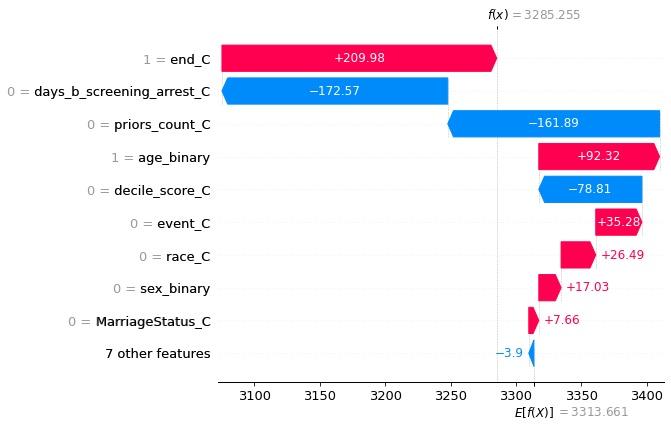

In [56]:
shap.plots.waterfall(shap_values[3496])


In [60]:
ranked_data = ranked_data[ranked_data["rank"] <= 100]


In [61]:
# end_c=0:
end_c_0 = ranked_data[ranked_data["end_C"] == 0]
end_c_0_idx = end_c_0.index
end_c_0_idx_lst = end_c_0_idx.tolist()



In [62]:
len(end_c_0_idx_lst)

100

In [49]:
sum(shap_values[end_c_0_idx_lst])


.values =
array([ 2.93383624e+04,  7.83325147e+02,  8.81505811e+02,  2.17411680e+03,
       -9.80429119e+03,  1.49071626e+05,  7.32944352e+03,  1.77314958e+03,
        2.45348902e+05,  1.11037981e+04,  3.61828403e+04,  7.42073903e+02,
        9.20443066e+02,  2.50861122e+03, -5.17497717e+06, -6.73074572e+04])

.base_values =
10093411.964477774

.data =
array([ 918,  480, 1657, 1381,   12, 1580,   12,    2,  593,  902,   26,
        865, 1037,    2,    0, 2031])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [40]:
# end_c=1:
end_c_1 = ranked_data[ranked_data["end_C"] == 1]
end_c_1_idx = end_c_1.index
end_c_1_idx_lst = end_c_1_idx.tolist()



In [41]:
len(end_c_1_idx_lst)

1288

In [48]:
sum(shap_values[end_c_1_idx_lst])


.values =
array([ 2.54041718e+04, -3.82296729e+03, -4.79770376e+03, -1.08705840e+03,
       -4.40192666e+03, -2.74854504e+03,  6.10786960e+02,  8.86574791e+02,
       -3.91522154e+04,  9.80656984e+03,  1.53081247e+04,  2.39509629e+01,
       -2.52051610e+02,  3.13576403e+04,  2.70456287e+05,  2.15827221e+03])

.base_values =
4267995.604152121

.data =
array([ 498,  242,  808,  715,    3,  401,    1,    1,  136,  390,   11,
        480,  289,   25, 1288,  503])

In [50]:
sum(shap_values)

.values =
array([ 1.35331896e+05, -2.40276474e+04, -2.82298623e+04, -8.10700597e+03,
       -2.36733244e+04,  7.67228272e+04,  9.16180441e+03,  5.31944874e+03,
       -5.79935964e+04,  1.49472832e+05,  8.76738054e+04,  4.38475150e+02,
       -7.55082454e+02,  5.76980581e+04,  5.09281710e+05,  1.64787698e+04])

.base_values =
22827811.892080452

.data =
array([2659, 1328, 4375, 3974,   15, 2516,   15,    6,  849, 2249,   63,
       2445, 1684,   46, 6398, 2633])

In [51]:
# end_c=2:
end_c_2 = ranked_data[ranked_data["end_C"] == 2]
end_c_2_idx = end_c_2.index
end_c_2_idx_lst = end_c_2_idx.tolist()



In [52]:
len(end_c_2_idx_lst)

2555

In [53]:
sum(shap_values[end_c_2_idx_lst])


.values =
array([ 8.05893615e+04, -2.09880053e+04, -2.43136644e+04, -9.19406437e+03,
       -9.46710657e+03, -6.96002535e+04,  1.22157392e+03,  2.65972437e+03,
       -2.64190283e+05,  1.28562464e+05,  3.61828403e+04, -3.27549716e+02,
       -1.42347391e+03,  2.38318066e+04,  5.41380259e+06,  8.16279548e+04])

.base_values =
8466404.323453942

.data =
array([1243,  606, 1910, 1878,    0,  535,    2,    3,  120,  957,   26,
       1100,  358,   19, 5110,   99])

0